In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

2024-06-12 01:08:29.278214: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_path = os.path.join(os.getcwd(), '..', '..', 'data', 'preprocessed_data.csv')

In [3]:
df = pd.read_csv(data_path)
df.head()

,property_name,room_id,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,...,beachfront,building_staff,lat,lng,booking_window,stay_duration_in_days,avg_rating,avg_review_sentiment_score,rating_count,average_daily_rate
0,Bingin Ombak,431874,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,81,4,4.3158,0.565051,19,1.477799e+06
1,Bingin Ombak,431875,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,81,4,4.0857,0.518720,35,1.477799e+06
2,Bingin Ombak,396658,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,81,4,4.0857,0.518720,35,1.477799e+06
3,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,81,4,4.5342,0.678392,164,1.477799e+06
4,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,81,4,4.5342,0.678392,164,1.477799e+06


## Prepare the data

In [4]:
X = df.drop(columns=['property_name', 'room_id', 'average_daily_rate'])
y = df['average_daily_rate']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = model.fit(X_train, 
          y_train, 
          epochs=100,
          batch_size=32,
          validation_data=(X_test, y_test))

Epoch 1/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 357706.0312 - mean_absolute_error: 357706.0312 - val_loss: 232049.4062 - val_mean_absolute_error: 232049.4062
Epoch 2/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 246973.2969 - mean_absolute_error: 246973.2969 - val_loss: 224053.5000 - val_mean_absolute_error: 224053.5000
Epoch 3/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 233952.4688 - mean_absolute_error: 233952.4688 - val_loss: 198810.1094 - val_mean_absolute_error: 198810.1094
Epoch 4/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 205744.8125 - mean_absolute_error: 205744.8125 - val_loss: 181058.5469 - val_mean_absolute_error: 181058.5469
Epoch 5/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 199580.7812 - mean_absolute_error: 199580.7812 - val_loss: 177389.0938 - val_mean_absolute_error: 177389.0938
Epoch 6/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 198023.2188 - mean_absolute_error: 198023.2188 - val_loss: 175353.3594 -

In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
95,170406.156250,170406.156250,149623.187500,149623.187500,95
96,169684.203125,169684.203125,148157.546875,148157.546875,96
97,170782.953125,170782.953125,147848.234375,147848.234375,97
98,170073.218750,170073.218750,147062.781250,147062.781250,98
99,169531.750000,169531.750000,148612.781250,148612.781250,99


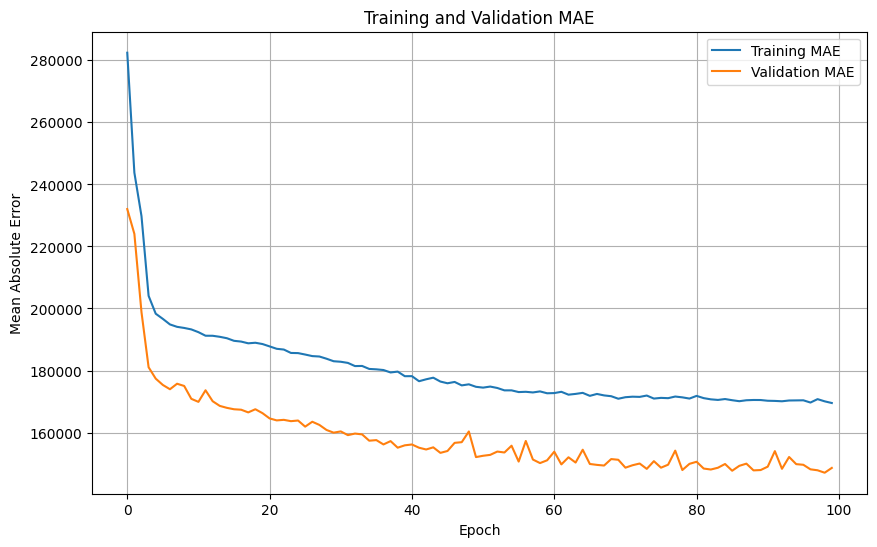

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Training MAE')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()
